# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import pandas as pd
import numpy as np

# Importing Data to python Environment

In [3]:
cd
# Finding Working Directory

C:\Users\Student 41


In [4]:
data = pd.read_csv('Comcast_data.csv')

In [5]:
data.head()
# Displaying The first 5 observations of the data set, to check if the data has been ingested correctly

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
data.info()
# Checking structure of Data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


# Generating Trend Chart at Monthly and Daily Granularity

In [7]:
data['month'] = pd.DatetimeIndex(data['Date_month_year']).month
## Extracing the Month from the 'Date_month_year' column and storing it in the the dataset as a new column called 'month'

In [8]:
data.head()
#viewing the data to check if the column has been created correctly

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [9]:
import matplotlib.pyplot as plt
# importing library for ploting.

Text(0.5, 1.0, 'Total Number of Monthly Complaint Recieved By Comcast For the Year 2015')

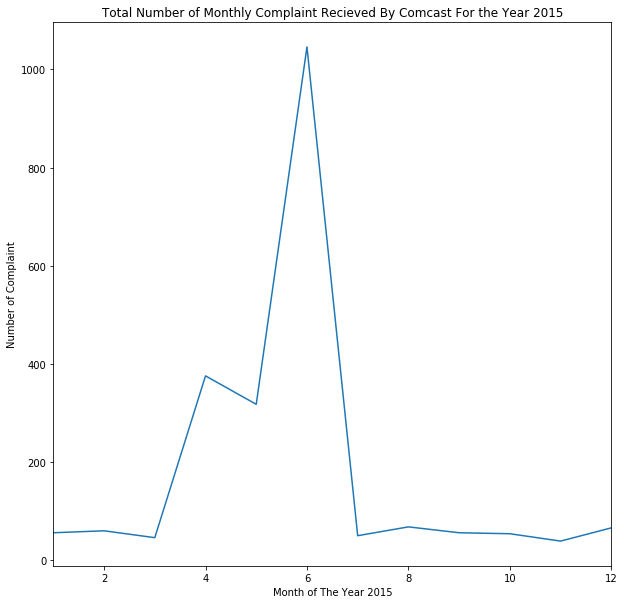

In [10]:
#ploting trend chart of monthly Complaints
data.groupby('month').size().plot(kind='line',figsize=(10,10))
plt.xlabel('Month of The Year 2015')
plt.ylabel('Number of Complaint')
plt.title('Total Number of Monthly Complaint Recieved By Comcast For the Year 2015')

Text(0.5, 1.0, 'Total Number of Daily Complaint Recieved By Comcast For the Year 2015')

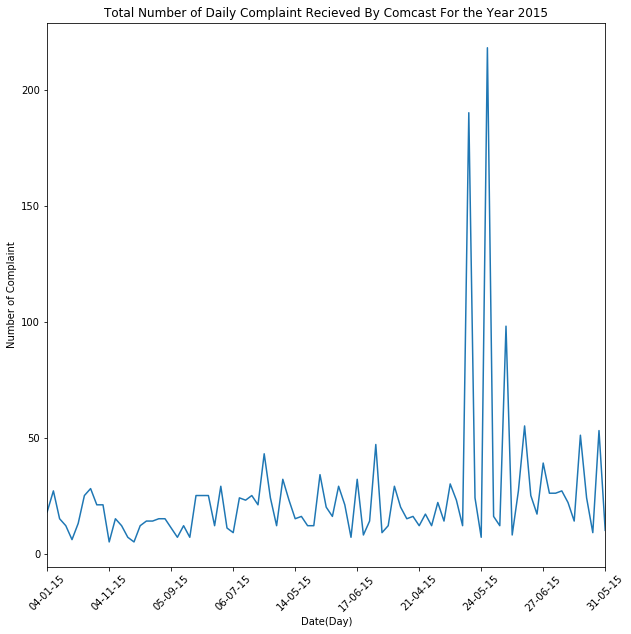

In [11]:
#ploting trend chart of Daily Complaints
data.groupby('Date').size().plot(kind='line',figsize=(10,10))
plt.xticks(rotation=45)
plt.xlabel('Date(Day)')
plt.ylabel('Number of Complaint')
plt.title('Total Number of Daily Complaint Recieved By Comcast For the Year 2015')

# Table with the frequency of complaint types

In [14]:
Complaint_type_frequencies = data['Customer Complaint'].value_counts()
Complaint_type_frequencies

Comcast                                                                                    83
Comcast Internet                                                                           18
Comcast Data Cap                                                                           17
comcast                                                                                    13
Data Caps                                                                                  11
Comcast Data Caps                                                                          11
Comcast Billing                                                                            11
Unfair Billing Practices                                                                    9
Comcast data cap                                                                            8
Comcast data caps                                                                           8
Comcast internet                                            

#  Creating a new categorical variable with value as Open and Closed. with Open & Pending from 'Status' column categorized as Open and Closed & Solved be categorized as Closed.

In [15]:
# Creating a new Column to be put in the Dataset, this colum is based on the column 'Status',
data['New_status'] = data['Status']

In [16]:
# viewing the data to chack if the new column has been added to Data
data.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,New_status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed


In [17]:
# categorising the New_status Column based on the reqcuirement
data['New_status'].replace(('Open','Pending'),'Open', inplace=True)
data['New_status'].replace(('Closed','Solved'),'Closed', inplace=True)

In [18]:
# viewing the data to check if the values in th New_status has been categorised correctly
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,New_status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed


#  State wise status of complaints in a stacked bar chart.

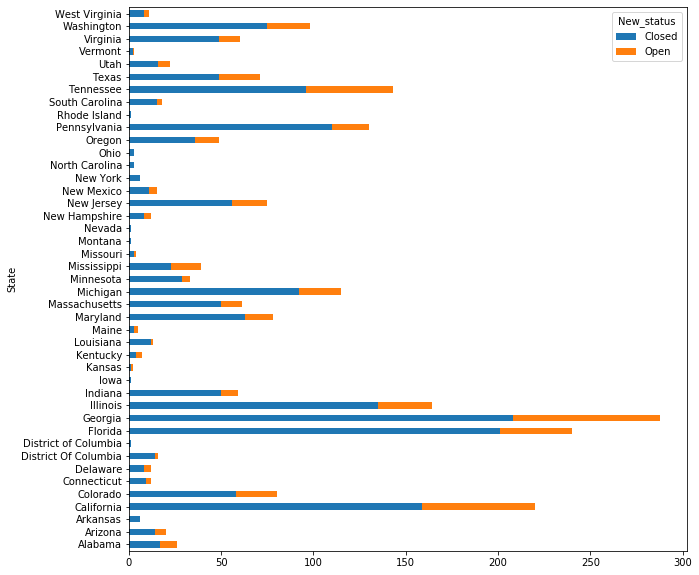

In [22]:
# Ploting stacked bar graph based on States and status of Complaints 
data.groupby(['State', 'New_status']).size().unstack().plot(kind='barh',figsize=(10,10), stacked=True)

# Percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [20]:
# creating new data by grouping 'New_status' and finding the size of each group, to find the number of resolved and unresolved Complaints
np1 = data.groupby(['New_status']).size()
np1

New_status
Closed    1707
Open       517
dtype: int64

In [21]:
# Calculating the percentage of Ressolved Complaints
Complaint_resolved= 1707/(1707+517)*100
Complaint_resolved

76.75359712230215

In [ ]:
# 76.5% of complaints were resolved